#### Beschreibung:
Implementierte die Normalisierte Kreuzkorrelation, die für den Translationsvergleich zwischen Signalen verwendet wird. Damit kann der Unterschied auf der X-Achse(Zeit) berechnet werden.

In [1]:
%run ../Setup.ipynb
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class NormalizedCrossCorrelationComparer:
    dataframe_1 = None
    dataframe_2 = None
    debug = False
    mode = 'full'
    ncorr = None
    argmax = None

    def __init__(self):
        pass
    
    def calculate(self, a, b):
        a = (a - np.mean(a)) / (np.std(a) * len(a))
        b = (b - np.mean(b)) / (np.std(b))
        c = np.correlate(a, b, self.mode)

        return c
    
    def getBestTranslation(self, df1, df2):
        self.dataframe_1 = df1.copy()
        self.dataframe_2 = df2.copy()
        
        self.ncorr = self.calculate(self.dataframe_1, self.dataframe_2)
        self.argmax = self.ncorr.argmax()
        
        if self.debug:
            print("ncorr: " + str(self.ncorr))
            print("argmax: " + str(self.argmax))
            plt.plot(self.ncorr)
        
        return self.argmax 

ncorr: [-0.22058824  0.44117647 -0.72058824  1.         -0.72058824  0.44117647
 -0.22058824]
argmax: 3
3


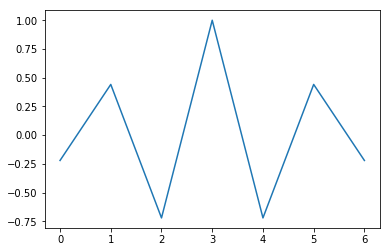

In [3]:
if __name__ == "__main__":
    comparer = NormalizedCrossCorrelationComparer()
    comparer.debug = True

    # datax = np.array([10, 20, 10, 30, 20, 10, 28, 22, 10])
    a = np.array([30, 20, 28, 22])
    b = np.array([30, 20, 28, 22])
    
    # a = np.array([1,2,-2,4,2,3,1,0])
    # b = np.array([2,3,-2,3,2,4,1,-1])
    # c = np.array([-2,0,4,0,1,1,0,-2])

    # comparer.getBestTranslation(datax, datay)
    ncorr = comparer.getBestTranslation(a, b)
    print(ncorr)
